***
#### About this document
_This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006) <br>This is a self contained Jupyter notebook with structure introduction, discussion and embeded code and bibliography._
<br>
**Code is hosted [here](https://github.com/lynneliu127/CASA0006-Data-science.git)**<br>
**Data is availble [here](https://github.com/lynneliu127/CASA0006-Data-science.git)**
***

# Assessment of the relationship between the London Index of Multiple Deprivation and the incidence of various types of crime
<p style="color:DimGray; text-align:left; font-size:20px"><i> the case of the London </i></p>
<a id="ID_title"></a>

<p style="color:DimGray; text-align:left;"><i>This study aims to explore how the dimensions in the IMD predict or influence crime rates across London boroughs, with a particular focus on the Violence Against the Person typology. The research will identify which socio-economic factors are most relevant to increases or decreases in crime rates by analysing the relationship between IMD scores and crime incidence in different boroughs.</i></p>

***

<a id="ID_intr"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Method](#ID_method) | [4.0 Data](#ID_data) | [5.0 Explore](#ID_explore) | [6.0 Analysis](#ID_analyse) | [7.0 Discussion and conclusion](#ID_conclude) | [Bibliography](#ID_biblio) 

## 1.0 | Introduction

In recent years, extensive research has been conducted on the relationship between urban crime and social deprivation. This connection is particularly scrutinized in major cities like London, where the link between criminal activity and social deprivation draws significant attention. Against this backdrop, this paper aims to explore the relationship between the 2019 London Index of Multiple Deprivation (IMD) and various categories of crime data, utilizing regression analysis and machine learning models (ridge regression and random forest) to parse their correlation and evaluate the performance of different models. This study examines how socio-economic factors measured by the IMD influence the overall crime rate across the city.

Utilizing open datasets from government databases, this research applies statistical methods to analyze the correlation and predictive power of IMD scores with crime incidence rates. The paper proposes the use of regression and predictive modeling techniques to analyze the relationship between the Index of Multiple Deprivation and crime. The results of this study could significantly enhance public safety strategies by precisely identifying the specific socio-economic factors that predict crime. By improving our understanding of these relationships, policymakers can devise more effective intervention measures aimed at mitigating crime in high-risk areas.

### 1.1 | Requirements to run the analysis

An overview of packages used to run the analysis with brief explanation of their role.

In [1]:
# Data Manipulation and General Purpose Libraries
# Visualization Libraries
import matplotlib.pyplot as plt
import numpy as np

# Importing necessary libraries
import pandas as pd
import seaborn as sns

# Regression Models
import statsmodels.api as sm

# Statistical Testing
from scipy.stats import pearsonr, spearmanr
from sklearn.ensemble import RandomForestRegressor

# Advanced Machine Learning - Feature Importance
from sklearn.inspection import permutation_importance

# Ridge Regression Specific
from sklearn.linear_model import LinearRegression, Ridge

# Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Preparation and Optimization
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    cross_val_score,
    train_test_split,
)
from sklearn.preprocessing import StandardScaler
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from tensorflow.keras.layers import Dense

# Advanced Machine Learning - Neural Networks
from tensorflow.keras.models import Sequential

2024-04-29 16:35:59.415176: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 16:35:59.423374: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 16:35:59.486486: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 16:36:00.943256: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 2.0 | Literature review

**Literature**<br>
Criminological theory and empirical studies consistently show that socio-economic factors significantly influence crime rates (Cohn, Coccia and Kakar, 2021). Factors such as economic instability, inadequate educational opportunities, high unemployment and housing problems are widely recognised as key drivers of criminal behaviour (Savolainen et al., 2013; Carr, Marie and Vujić, 2023).

The Index of Multiple Deprivation (IMD) is a composite indicator used to assess levels of social and economic deprivation in each region of the UK (Deas et al., 2003). It includes aspects of income, employment, health, education, housing and the environment, making it an important tool for assessing the wellbeing of communities and potential risk of crime (Wikstrom and Butterworth, 2006; Tan and Haining, 2009; Exeter et al., 2017). Research has shown that areas with higher IMD scores typically have higher crime rates. For example, lower levels of education and high unemployment are directly associated with higher rates of violent and property crime. Additionally, poor health is strongly associated with drug-related crime (Tarling and Dennis, 2016).

In recent years, researchers have begun to use statistical and machine learning models to predict crime rates (McClendon and Meghanathan, 2015). Models such as Random Forests, Support Vector Machines and Neural Networks have been used to predict the incidence of crime in specific areas, often using historical data for training and validation (Safat, Asghar and Gillani, 2021). While many studies have explored the relationship between socio-economic indicators and crime, research on the links between specific types of crime (e.g. cybercrime, domestic violence) and IMD dimensions remains limited (Safat, Asghar and Gillani, 2021).

This study investigates how the Index of Multiple Deprivation (IMD) in London impacts various types of crime and identifies which indices have the most significant effects. By analyzing the 2019 crime data and IMD, it explores which deprivation indices most profoundly influence crime rates. The research also compares the performance of ridge regression and random forest models, assessing their strengths and weaknesses in interpreting crime data to predict future crime occurrences.

Research questions

    RQ1 | Based on London Which IMD dimensions have significant correlations with specific offence types?
    RQ2 | How can IMD dimensions be used to predict the incidence of crime?
    
To address this issue, this paper uses regression analysis and machine learning models to develop predictive models. Regression analysis will be used to explain the correlation between the Index of Multiple Deprivation (IMD) and various types of crime, while ridge regression and random forests will be used to predict crime rates and assess the performance of the models.


## 3.0 | Methodology

**Correlation analysis** Pearson's correlation coefficient was used to assess the strength and direction of the linear relationship between two quantitative variables, which is suitable for situations where the data are assumed to be normally distributed and the relationship is linear. In addition, the Spearman rank correlation coefficient was used, which is a non-parametric method for assessing the correlation between the ranks of two variables, and is particularly suitable for situations where the data distribution does not conform to normal distribution or where the relationship between the variables is likely to be non-linear. In order to determine whether the observed correlation is statistically significant, a significance test was conducted to test whether the correlation may be due to chance alone by calculating a p-value. The level of significance is usually set at 0.05 or 0.01. With these tests, we can more accurately determine whether the correlation between variables is significant or not, enhancing the reliability and explanatory power of the findings. (Y).

**Regression Analysis** In our regression analysis, a multiple linear regression model was first used to explore the linear relationship between multiple independent variables and a dependent variable. The method assumes that the relationship between the variables is linear and that the error terms are normally distributed with independent homogeneous distributions. We assessed the model fit and the significance of the variables through the adjusted **𝑅²** values and F-statistics. We further applied a ridge regression model for the presence of high covariance between variables. Ridge regression effectively reduces the instability of the regression coefficients by introducing the **ridge parameter (λ)** as a penalty term, thus reducing the risk of overfitting the model. We selected the optimal ridge parameters by the cross-validation method to balance the explanatory power and predictive accuracy of the model. The performance of the model is finally assessed by the mean square error (MSE) and the adjusted and adjusted **𝑅²** values, which ensures analytical rigour and reliability of the results. 

**Predictive Modelling** In our machine learning study, we chose to use ridge regression and random forest model models, whose predictive accuracy and model stability are improved by constructing multiple decision trees and aggregating their results, suitable for dealing with classification and regression problems on large-scale datasets. Each decision tree is trained on a randomly selected subsample of data and feature set, a strategy that effectively reduces overfitting while improving model performance on unseen data. We assess model performance through cross-validation and a range of metrics such as accuracy, recall and F1 scores to ensure analytical rigour and reliability of results.*

ity of later parts. 


## 4.0 | Data preparation

**Multiple Deprivation Index (MDI) data for 2019**
The Multiple Deprivation Index (MDI) is commonly used to measure the level of socio-economic deprivation in an area. This index integrates multiple dimensions such as education, health, income and living conditions to assess the state of socio-economic deprivation of an area's residents relative to other areas. The original dataset is the 2019 Index of Multiple Deprivation data for England. The code below begins by collating and summarising the available data. Multiple Deprivation Index score datasets are typically formatted to include geographic identifiers (e.g. postcode or area code), deprivation scores and rankings for each area, demographic information, and other relevant socio-economic indicators (e.g. unemployment, average income, educational attainment and health status). The deprivation indices are first filtered to produce a breakdown of the scores for each category and stored in the imd_data database, the analysis for this project focuses on the London region dataset but the full dataset can be downloaded [here](https://data.cdrc.ac.uk/dataset/index-multiple-deprivation-imd).

**LONDON CRIME DATA** This dataset, provided by the Metropolitan Police, provides an exhaustive record of crime in the London area, meticulously disaggregated at different geographic levels (Boroughs, Districts, LSOAs). This geographical breakdown allows for accurate spatial analysis of crime data, helping to understand the security situation in different areas. The dataset is categorised by crime type, month and three different geographical levels (Borough, District, LSOA). The data is split into two types: one includes the most recent data for the last 24 months and the other contains all historical data from 2008 onwards. From March 2019, the data is organised according to the updated Home Office Crime Classification (HOC), which provides a detailed breakdown of crime categories, including arson, burglary, drug offences, and many other specialised and sub-specialised classifications. The MPS LSOA Level Crime (Historical).csv dataset was selected for this project, and the 2019 crime data was filtered and statistically classified for each category of crime at the data processing stage.[data](https://data.london.gov.uk/dataset/recorded_crime_summary)

**Study variables:**

Index of Multiple Deprivation:

- IMDScore: The overall Index of Multiple Deprivation composite score, which summarises information from all of the individual indicators below.
  
- IncScore: Income score, reflecting the extent to which people in the community have low incomes.
  
- EmpScore: Employment score, which measures the extent of unemployment and low employment in the community.
  
- EduScore: Education, Skills and Training Score, indicative of educational attainment and skills development within the community.
  
- HDDScore: Health Deprivation and Disability Score, assessing the rate of health problems and disability within the community.
  
- CriScore: Crime Score, reflecting crime rates and policing in the community.
  
- BHSScore: Barriers to Housing and Services Score, which measures how easy it is for people in the community to access housing and services.
  
- EnvScore: Living Environment Score, which evaluates the environmental quality of the community, such as air pollution and housing conditions.
  
- IDCScore: Child Deprivation Index Score, which looks at the deprivations faced by children.
  
- IDOScore: Older people's deprivation index score, which assesses the deprivation faced by the older population.
  
- CYPScore: Children and Young People's Deprivation Score, focussing on deprivation faced by young people.
  
- ASScore: Adult Skills Deprivation Score, which measures deprivation of adult skill levels and qualifications.
  
- GBScore: Geographic Barriers Score, which evaluates the impact of geography on the daily lives of people in the community.
  
- WBScore: Broadband Connectivity Score, which measures the problems that communities may experience in accessing broadband services.
  
- IndScore: Industrial Deprivation and Unemployment Score, which captures the impact of industrial structure and unemployment on the community.
  
- OutScore: Outdoor Space Score, which relates to the ability of community residents to access green spaces and recreational spaces.

Crime type:

- Miscellaneous Crimes Against Society
     
- Theft
                             
- Vehicle Offences
                       
- Public Order Offences
                  
- Possession of Weapons
                   
- Violence Against the Person
             
- Burglary
                                 
- Drug Offences
                            
- Arson and Criminal Damage
                
- Robbery

### 4.1 | Load data

In [2]:
# Read multiple deprivation index data
imd_data = pd.read_csv("data/IMD_2019.csv")
print("deprivation index data:")
print(imd_data.head())  

# crime
crime_data = pd.read_csv("data/MPS LSOA Level Crime (Historical).csv")
print("\ncrime:")
print(crime_data.head()) 

deprivation index data:
    lsoa11cd                   lsoa11nm                  lsoa11nmw  \
0  E01000001        City of London 001A        City of London 001A   
1  E01000002        City of London 001B        City of London 001B   
2  E01000003        City of London 001C        City of London 001C   
3  E01000005        City of London 001E        City of London 001E   
4  E01000006  Barking and Dagenham 016A  Barking and Dagenham 016A   

      st_areasha   st_lengths  IMD_Rank  IMD_Decile  \
0  133320.768872  2291.846072     29199           9   
1  226191.272990  2433.960112     30379          10   
2   57302.966538  1142.359799     14915           5   
3  190738.760504  2167.868343      8678           3   
4  144195.846857  1935.510354     14486           5   

                    LSOA01NM      LADcd                 LADnm  ...  IndRank  \
0        City of London 001A  E09000001        City of London  ...    16364   
1        City of London 001B  E09000001        City of London  ...

### 4.2 | Data Cleaning

Geocodes and associated Index of Multiple Deprivation scores were screened in preparation for linking with London crime data via geocodes, at which point the geographic range of multiple deprivation was not yet screened

In [3]:
columns_of_interest = [
    "lsoa11cd",
    "lsoa11nm",
    "IMDScore",
    "IncScore",
    "EmpScore",
    "EduScore",
    "HDDScore",
    "CriScore",
    "BHSScore",
    "EnvScore",
    "IDCScore",
    "IDOScore",
    "CYPScore",
    "ASScore",
    "GBScore",
    "WBScore",
    "IndScore",
    "OutScore",
]

# filtering data
imd_data = imd_data[columns_of_interest]


imd_data.head()

,lsoa11cd,lsoa11nm,IMDScore,IncScore,EmpScore,EduScore,HDDScore,CriScore,BHSScore,EnvScore,IDCScore,IDOScore,CYPScore,ASScore,GBScore,WBScore,IndScore,OutScore
0,E01000001,City of London 001A,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873,0.006,0.012,-2.107,0.032,-0.430,3.587,0.006,1.503
1,E01000002,City of London 001B,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084,0.037,0.030,-1.907,0.034,-1.060,3.231,-0.410,1.196
2,E01000003,City of London 001C,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535,0.052,0.128,-0.292,0.142,-0.691,5.173,-0.054,2.207
3,E01000005,City of London 001E,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,0.209,0.322,0.338,0.321,-1.167,5.361,-0.604,1.769
4,E01000006,Barking and Dagenham 016A,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0.155,0.162,-0.366,0.325,-0.400,5.590,0.110,0.969


In [4]:
columns_of_interest = [
    "lsoa11cd",
    "lsoa11nm",
    "IMDScore",
    "IncScore",
    "EmpScore",
    "EduScore",
    "HDDScore",
    "CriScore",
    "BHSScore",
    "EnvScore",
    "IDCScore",
    "IDOScore",
    "CYPScore",
    "ASScore",
    "GBScore",
    "WBScore",
    "IndScore",
    "OutScore",
]


imd_data = imd_data[columns_of_interest]


imd_data.head()

,lsoa11cd,lsoa11nm,IMDScore,IncScore,EmpScore,EduScore,HDDScore,CriScore,BHSScore,EnvScore,IDCScore,IDOScore,CYPScore,ASScore,GBScore,WBScore,IndScore,OutScore
0,E01000001,City of London 001A,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873,0.006,0.012,-2.107,0.032,-0.430,3.587,0.006,1.503
1,E01000002,City of London 001B,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084,0.037,0.030,-1.907,0.034,-1.060,3.231,-0.410,1.196
2,E01000003,City of London 001C,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535,0.052,0.128,-0.292,0.142,-0.691,5.173,-0.054,2.207
3,E01000005,City of London 001E,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,0.209,0.322,0.338,0.321,-1.167,5.361,-0.604,1.769
4,E01000006,Barking and Dagenham 016A,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0.155,0.162,-0.366,0.325,-0.400,5.590,0.110,0.969


对一个犯罪数据集进行处理和汇总，目的是筛选出感兴趣的列，计算年度犯罪总和，并重新组织数据以便于分析。首先，代码定义了一组感兴趣的列，包括地理代码、地名、主要犯罪类别和2019年各月的犯罪数据。

代码使用groupby()函数将数据按地理代码、地名和犯罪类别分组，并计算了这些分组的犯罪总和。

In [5]:
columns_of_interest = [
    "LSOA Code",
    "LSOA Name",
    "Major Category",
    "201901",
    "201902",
    "201903",
    "201904",
    "201905",
    "201906",
    "201907",
    "201908",
    "201909",
    "201910",
    "201911",
    "201912",
]

# filtering
crime_data = crime_data[columns_of_interest]


crime_data.head()

,LSOA Code,LSOA Name,Major Category,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,E01000006,Barking and Dagenham 016A,Arson and Criminal Damage,0,0,1,0,0,0,0,0,0,0,0,0
1,E01000006,Barking and Dagenham 016A,Arson and Criminal Damage,1,0,1,2,0,1,0,0,1,0,0,0
2,E01000006,Barking and Dagenham 016A,Burglary,0,0,0,0,0,0,0,0,0,0,0,0
3,E01000006,Barking and Dagenham 016A,Burglary,2,0,1,0,3,1,0,2,0,1,1,2
4,E01000006,Barking and Dagenham 016A,Drug Offences,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
monthly_columns = [
    "201901",
    "201902",
    "201903",
    "201904",
    "201905",
    "201906",
    "201907",
    "201908",
    "201909",
    "201910",
    "201911",
    "201912",
]

# Calculate yearly totals for each row and create new column '2019'
crime_data["2019"] = crime_data[monthly_columns].sum(axis=1)

# The data containing the new totals column can now be viewed
print(crime_data[["LSOA Code", "Major Category", "LSOA Name", "2019"]].head())

   LSOA Code             Major Category                  LSOA Name  2019
0  E01000006  Arson and Criminal Damage  Barking and Dagenham 016A     1
1  E01000006  Arson and Criminal Damage  Barking and Dagenham 016A     6
2  E01000006                   Burglary  Barking and Dagenham 016A     0
3  E01000006                   Burglary  Barking and Dagenham 016A    13
4  E01000006              Drug Offences  Barking and Dagenham 016A     0


In [7]:
# Define the month columns to be summarised
months_columns = ["2019"]

# groupby()
summary_data = crime_data.groupby(["LSOA Code", "LSOA Name", "Major Category"])[
    months_columns
].sum()

# Reset indexes so that grouped columns are also normal columns
summary_data.reset_index(inplace=True)


summary_data.head()

,LSOA Code,LSOA Name,Major Category,2019
0,E01000006,Barking and Dagenham 016A,Arson and Criminal Damage,7
1,E01000006,Barking and Dagenham 016A,Burglary,13
2,E01000006,Barking and Dagenham 016A,Drug Offences,6
3,E01000006,Barking and Dagenham 016A,Miscellaneous Crimes Against Society,4
4,E01000006,Barking and Dagenham 016A,Possession of Weapons,0


The pivot_table() function was used to convert the data from a long format to a wide format, making each offence category a separate column and presenting the offence data for each geographic unit in a single row.

In [8]:
# Convert data from long to wide format using pivot_table
crime_df = summary_data.pivot_table(index='LSOA Code', 
                                    columns='Major Category', 
                                    values='2019', 
                                    aggfunc='sum')

# Simplify the multi-level column index to a single level containing only the crime type
crime_df.columns = [col for col in crime_df.columns.values]  # Simplified to take the category name directly

# Handle NaN values: fill NaN with 0 because in crime statistics, NaN may mean no crime occurred
crime_df.fillna(0, inplace=True)

# Convert all column data types to integers
crime_df = crime_df.astype(int)

# Reset the index to make the 'LSOA Code' a normal column
crime_df.reset_index(inplace=True)

# Show a preview of the reconstructed data
crime_df.head()


,LSOA Code,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Theft,Vehicle Offences,Violence Against the Person
0,E01000006,7,13,6,4,0,5,11,6,14,42
1,E01000007,21,20,67,6,6,29,58,150,32,130
2,E01000008,15,17,17,3,0,14,6,53,40,48
3,E01000009,14,14,23,2,1,16,31,67,20,82
4,E01000011,8,4,8,1,0,1,4,10,12,43


### 4.3 | Merging data frames

Merge the two datasets, clean the merged data and save the final result. Using the merge() function, the crime_df dataset (which may contain crime data for a region) and the imd_data dataset (which may contain multiple deprivation index data for a corresponding region) are left-joined and merged based on the "LSOA Code" column and the "lsoa11cd" column. (which may contain crime data for a region) and imd_data data (which may contain Index of Multiple Deprivation data for the corresponding region) are left-joined.

In [9]:
# Use the merge() function to combine data, based on 'LSOA Code' and 'lsoa11cd'
london_df = pd.merge(
    crime_df, imd_data, left_on="LSOA Code", right_on="lsoa11cd", how="left"
)

# Use dropna() to remove rows containing any NaN values
london_df = london_df.dropna()

# Use drop() to remove column 'lsoa11cd'
london_df = london_df.drop("lsoa11cd", axis=1)

# Show a preview of the combined data
london_df.head()

# Optionally save the combined data to a new CSV file
london_df.to_csv("london_df.csv", index=False)

## 5.0 | Exploratory Data Analysis (EDA)

### 5.1 | IMD
Multiple dimensions of the London Index of Multiple Deprivation (IMD), such as income score, employment score and education score. By plotting histograms for each indicator, the distributional characteristics of the indicators can be visualised, thus providing a basis for further analysis.

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

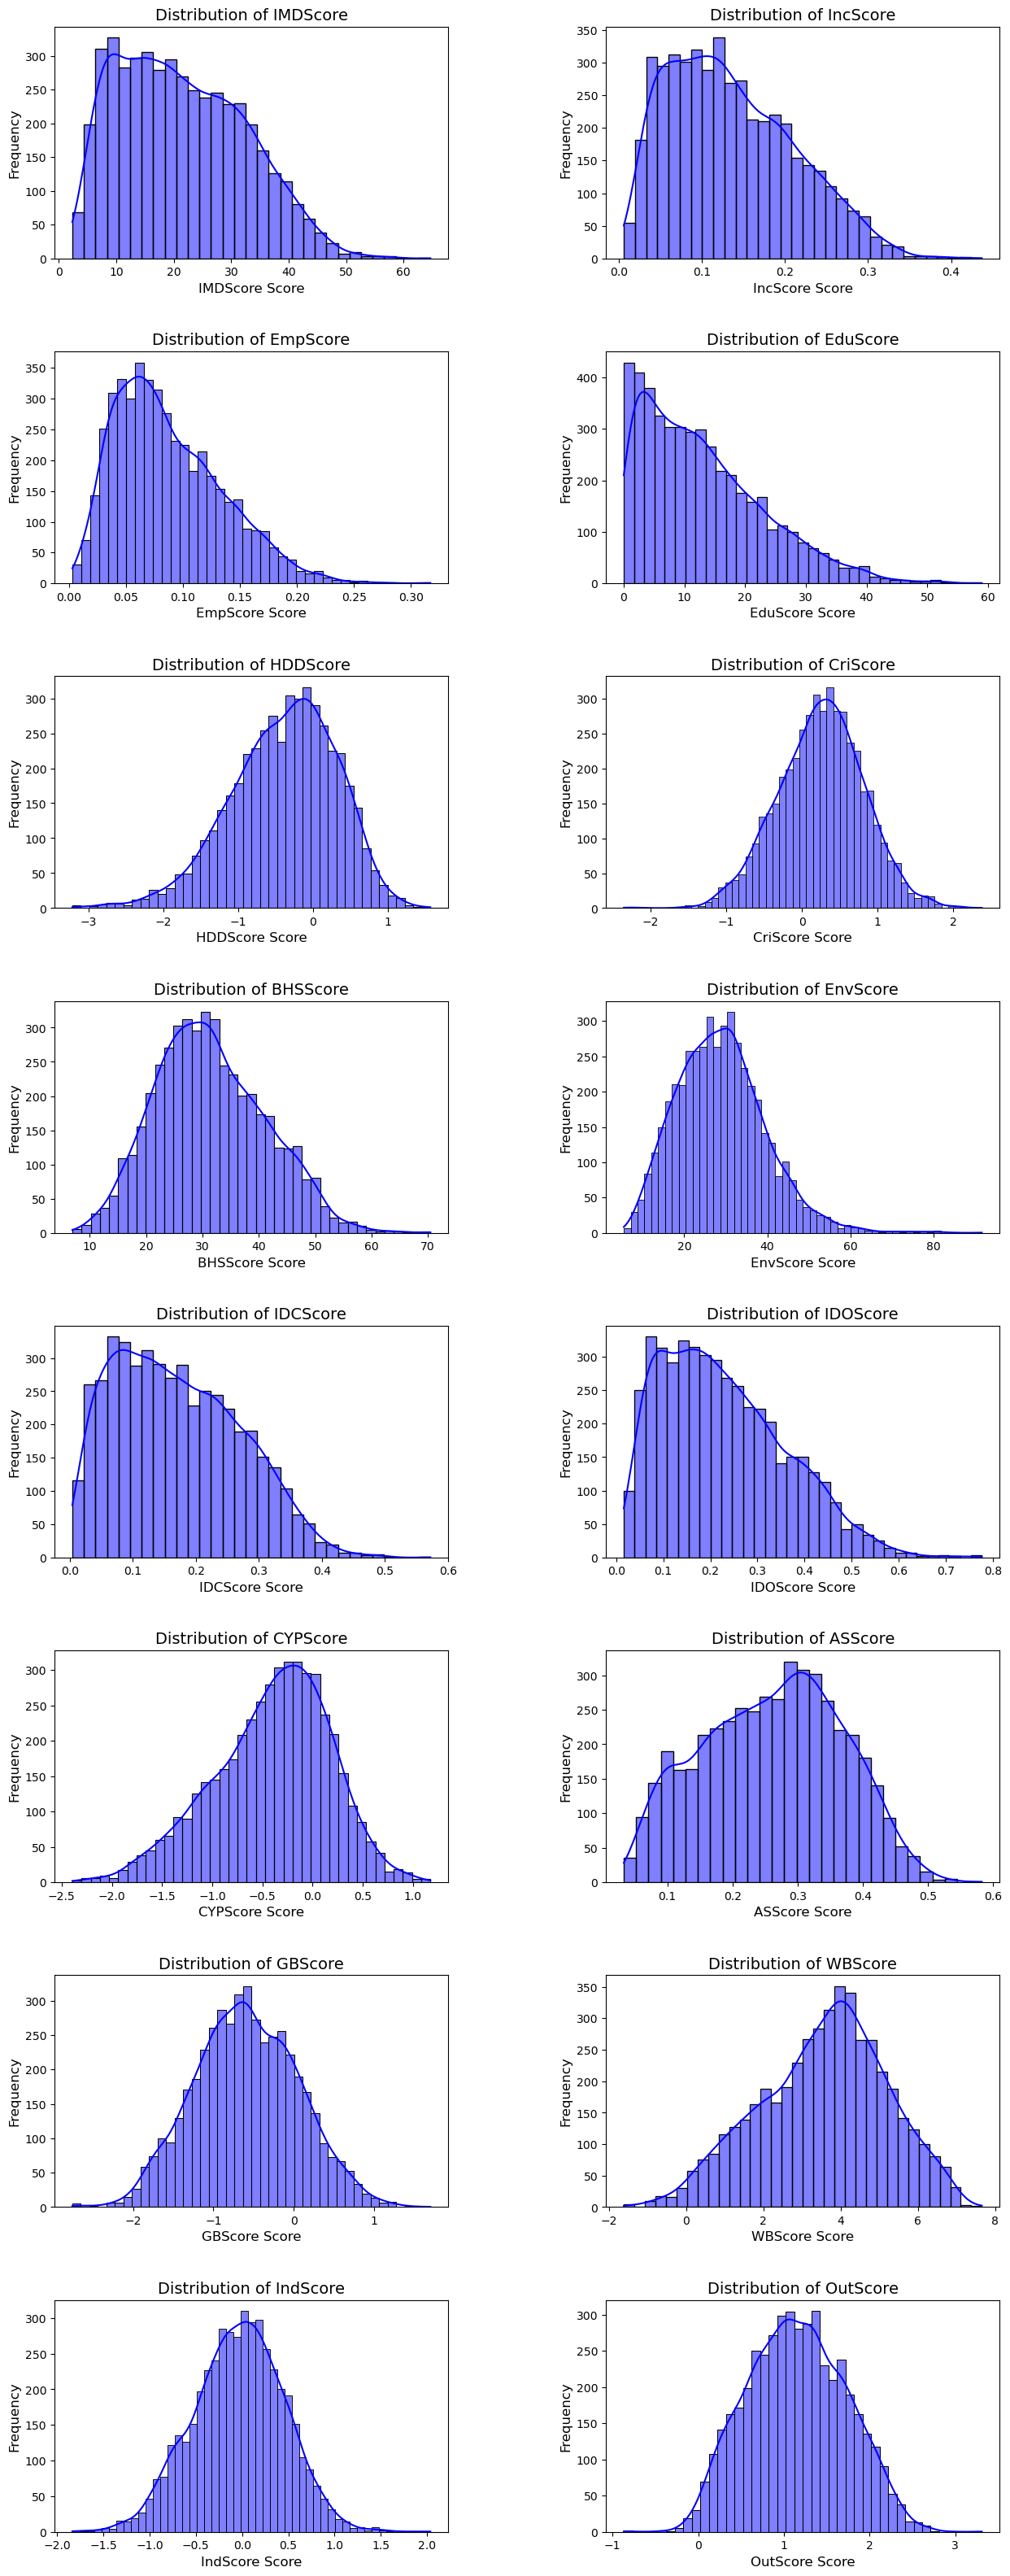

In [11]:
indices = [
    'IMDScore', 'IncScore', 'EmpScore', 'EduScore', 'HDDScore', 'CriScore', 'BHSScore', 
    'EnvScore', 'IDCScore', 'IDOScore', 'CYPScore', 'ASScore', 'GBScore', 
    'WBScore', 'IndScore', 'OutScore'
]

# Calculate the number of rows of subgraphs needed, putting 2 subgraphs per row
n_rows = (len(indices) + 1) // 2

# Create a big plot and subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows)) # Resize the subplots and the overall layout size
fig.subplots_adjust(hspace=0.4, wspace=0.4) # Adjust horizontal and vertical spacing between subplots to avoid overlapping labels

# Loop over the indicators and plot histograms in the corresponding subplots
for i, index in enumerate(indices):
    ax = axes.flatten()[i]
    sns.histplot(data=london_df, x=index, kde=True, color='blue', ax=ax)
    ax.set_title(f'Distribution of {index}', fontsize=14) # Set title and font size
    ax.set_xlabel(f'{index} Score', fontsize=12) # Set x-axis label and font size
    ax.set_ylabel('Frequency', fontsize=12) # Set y-axis label and fontsize

# If the number of indices is odd, hide the axes of the last subplot
if len(indices) % 2 != 0:
    axes.flatten()[-1].axis('off')

# Show the chart
plt.show()


This set of histograms presents us with the distribution of Index of Multiple Deprivation (IMD) scores across London's neighbourhoods. Most of the indicators appear to be symmetrically distributed around a central peak, suggesting that communities are relatively consistent across these dimensions of economic and social deprivation. Nonetheless, the distributions of some of the indicators exhibit slight skewness, suggesting that we may have a tendency for particular communities to be relatively high or low on certain deprivation indices, which may affect crime rates in these areas. Analysing such skewness is critical to uncovering and understanding the underlying socioeconomic drivers of crime occurrence.

In [28]:
columns_of_interest = [
    'IMDScore', 'IncScore', 'EmpScore', 'EduScore', 'HDDScore', 'CriScore', 'BHSScore', 
    'EnvScore', 'IDCScore', 'IDOScore', 'CYPScore', 'ASScore', 'GBScore', 
    'WBScore', 'IndScore', 'OutScore'
]

# Assuming 'london_df' is a pandas DataFrame containing these columns
# Calculate descriptive statistics for the selected columns
descriptive_stats = london_df[columns_of_interest].describe()

# Display the descriptive statistics table
descriptive_stats.head()


,IMDScore,IncScore,EmpScore,EduScore,HDDScore,CriScore,BHSScore,EnvScore,IDCScore,IDOScore,CYPScore,ASScore,GBScore,WBScore,IndScore,OutScore
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,21.357835,0.135552,0.087364,13.070781,-0.388668,0.252310,31.462649,28.869135,0.170481,0.228231,-0.405018,0.261269,-0.588468,3.545709,-0.037861,1.151947
std,10.944030,0.075785,0.046895,10.027453,0.704572,0.564898,9.731632,10.644647,0.098899,0.131623,0.579536,0.106273,0.644806,1.643437,0.491756,0.573622
min,2.326000,0.006000,0.003000,0.013000,-3.215000,-2.354000,6.910000,5.450000,0.004000,0.016000,-2.394000,0.033000,-2.756000,-1.621000,-1.836000,-0.868000
25%,12.242000,0.074000,0.051000,4.798000,-0.841000,-0.122000,24.374000,21.199000,0.088000,0.122000,-0.773000,0.179000,-1.032000,2.427000,-0.365000,0.725000


The IMD data showcases a broad spectrum of scores across its various dimensions, indicating significant disparities in levels of deprivation among different regions in London. The overall IMD Score averages around 21.35 with a standard deviation of 10.94, underscoring the variance across locales. Spanning from 2.33 to 64.68, this range points to substantial contrasts in the degree of deprivation within the city. The Income and Employment scores, both closely clustered around zero, suggest a relative uniformity in these aspects of deprivation across the sampled population. Education scores, while averaging near zero, present a slightly broader standard deviation, hinting at a certain level of heterogeneity. The expansive spread is indicative of notable differences in educational deprivation. Health Deprivation and Disability scores dip into the negative, potentially reflecting a beneficial aspect of London's health and disability policies. Crime scores maintain a low average near zero, with a moderate standard deviation reflecting variance in crime rates across different areas. Scores such as BHSScore, EnvScore, IDCScore, and IDOScore, representing barriers to housing and services, environmental quality, child and elderly population deprivation respectively, exhibit higher averages compared to others, particularly BHSScore, which may signal these as more pressing issues within the sampled areas. Scores related to children and young people, adult skills, geographical barriers, wider barriers, industry, and outdoor spaces (CYPScore, ASScore, GBScore, WBScore, IndScore, OutScore) display moderate variability and are centered around lower means, implying a less pronounced deprivation in these domains.

### 5.2 | Crime
The value_counts() method calculates the frequency of occurrence of each value in the 'Major Category' column of the crime_data data frame.

Crime Frequency:
 Major Category
Miscellaneous Crimes Against Society    36749
Theft                                   18974
Vehicle Offences                        18972
Public Order Offences                   15454
Possession of Weapons                   14442
Violence Against the Person             11105
Burglary                                 9974
Drug Offences                            9771
Arson and Criminal Damage                9504
Robbery                                  8983
Name: count, dtype: int64


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


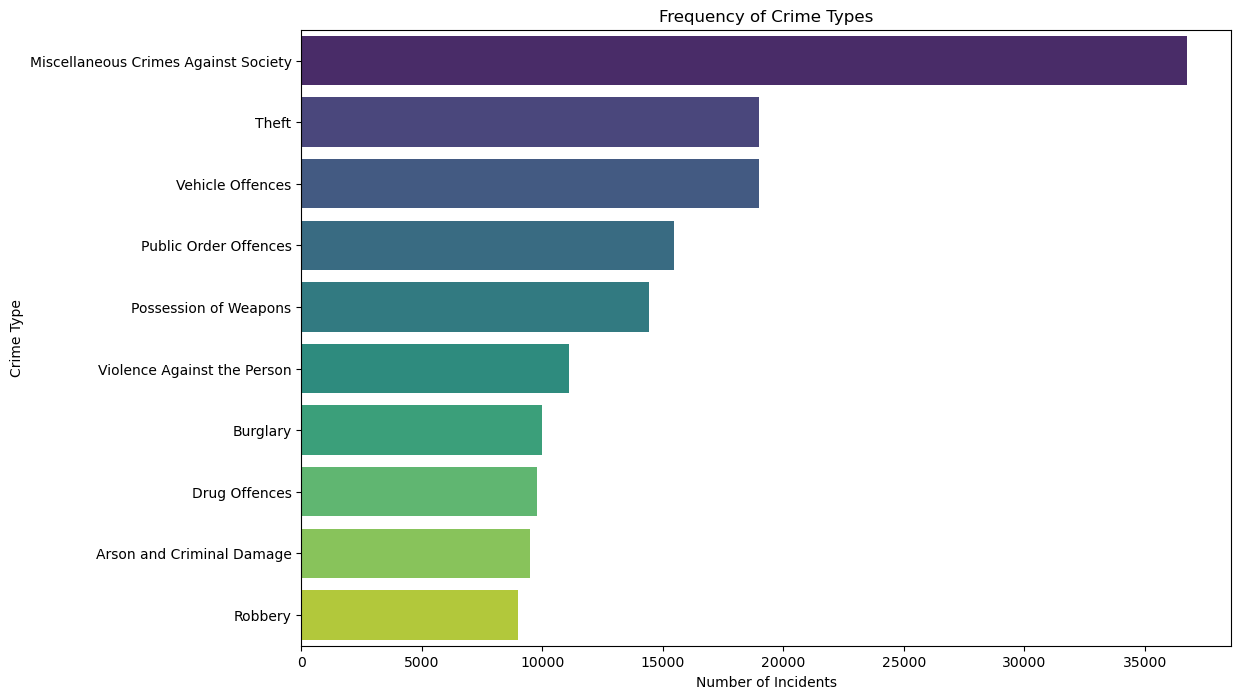

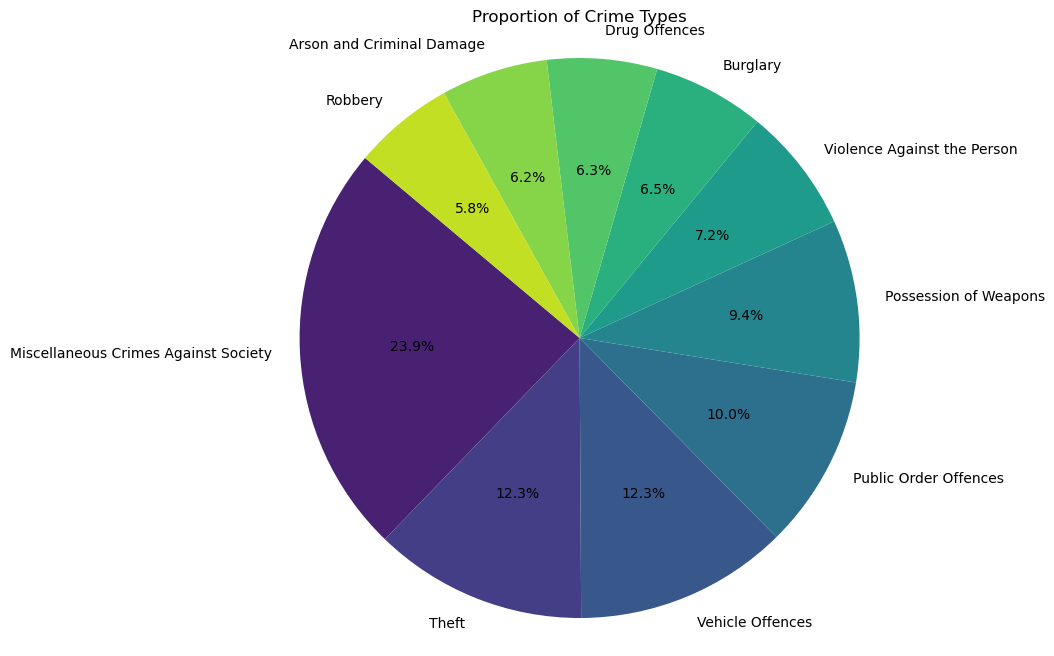

In [14]:
# Calculate the frequency of each crime type
crime_frequency = crime_data['Major Category'].value_counts()
print("Crime Frequency:\n", crime_frequency)

# Plot the bars
plt.figure(figsize=(12, 8))  # Corrected argument name for figsize
sns.barplot(x=crime_frequency.values, y=crime_frequency.index, palette='viridis')
plt.title('Frequency of Crime Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.show()

# Plot the pie chart
plt.figure(figsize=(10, 8))  # Corrected argument name for figsize
plt.pie(crime_frequency, labels=crime_frequency.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(crime_frequency)))  # Corrected argument names and syntax
plt.title('Proportion of Crime Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


The 'Miscellaneous Crimes Against Society' category topped the list of recorded crimes in London in 2019 with 36,749 cases, indicating that this type of offence was the most prevalent in the year. Property-related offences such as 'Theft' and 'Vehicle Offences' followed closely behind with 18,974 and 18,972 cases respectively, showing that property security is a major social security issue.' Public Order Offences' with 15,454 cases, reflecting issues of disturbed social behaviour and order.' Possession of Weapons', with 14,442 cases, highlights the issue of armed threats and potential violence. 'Violence Against the Person' was relatively low, but at 11,105 cases it still highlights the direct danger to public safety.' Burglary' and 'Drug Offences', with 9,974 and 9,771 cases respectively, show criminal activity related to trespass to property and controlled drugs.' Arson and Criminal Damage' and 'Robbery' were the lesser reported categories, with 9,504 and 8,983 cases respectively, but these crimes continue to have a significant impact on the safety and wellbeing of communities. These data provide valuable information for law enforcement and public policymakers to develop strategies for crime prevention and community safety enhancement.

## 6.0 | Analysis

To analyze the impact of the London Index of Multiple Deprivation on various types of crime and develop predictive models, the study will:

1. **Select Representative Crime Types**: Identify crime categories based on relevance and significance.2. **Conduct Regression Analysis and Parameter Tuning**: Analyze the relationships using regression models and optimize the model parameters for accuracy.3. **Predictive Modeling**: Develop and validate predictive models to forecast future crime rates effectively.

The below code lays out functions and code to carry out all three steps.

### 6.1 | Select Representative Crime Types

Correlation analysis: The Index of Multiple Deprivation (IMD) and its relationship with the type of offence in the dataset were analysed for correlation, specifically using Spearman's correlation coefficient and Pearson's correlation coefficient.

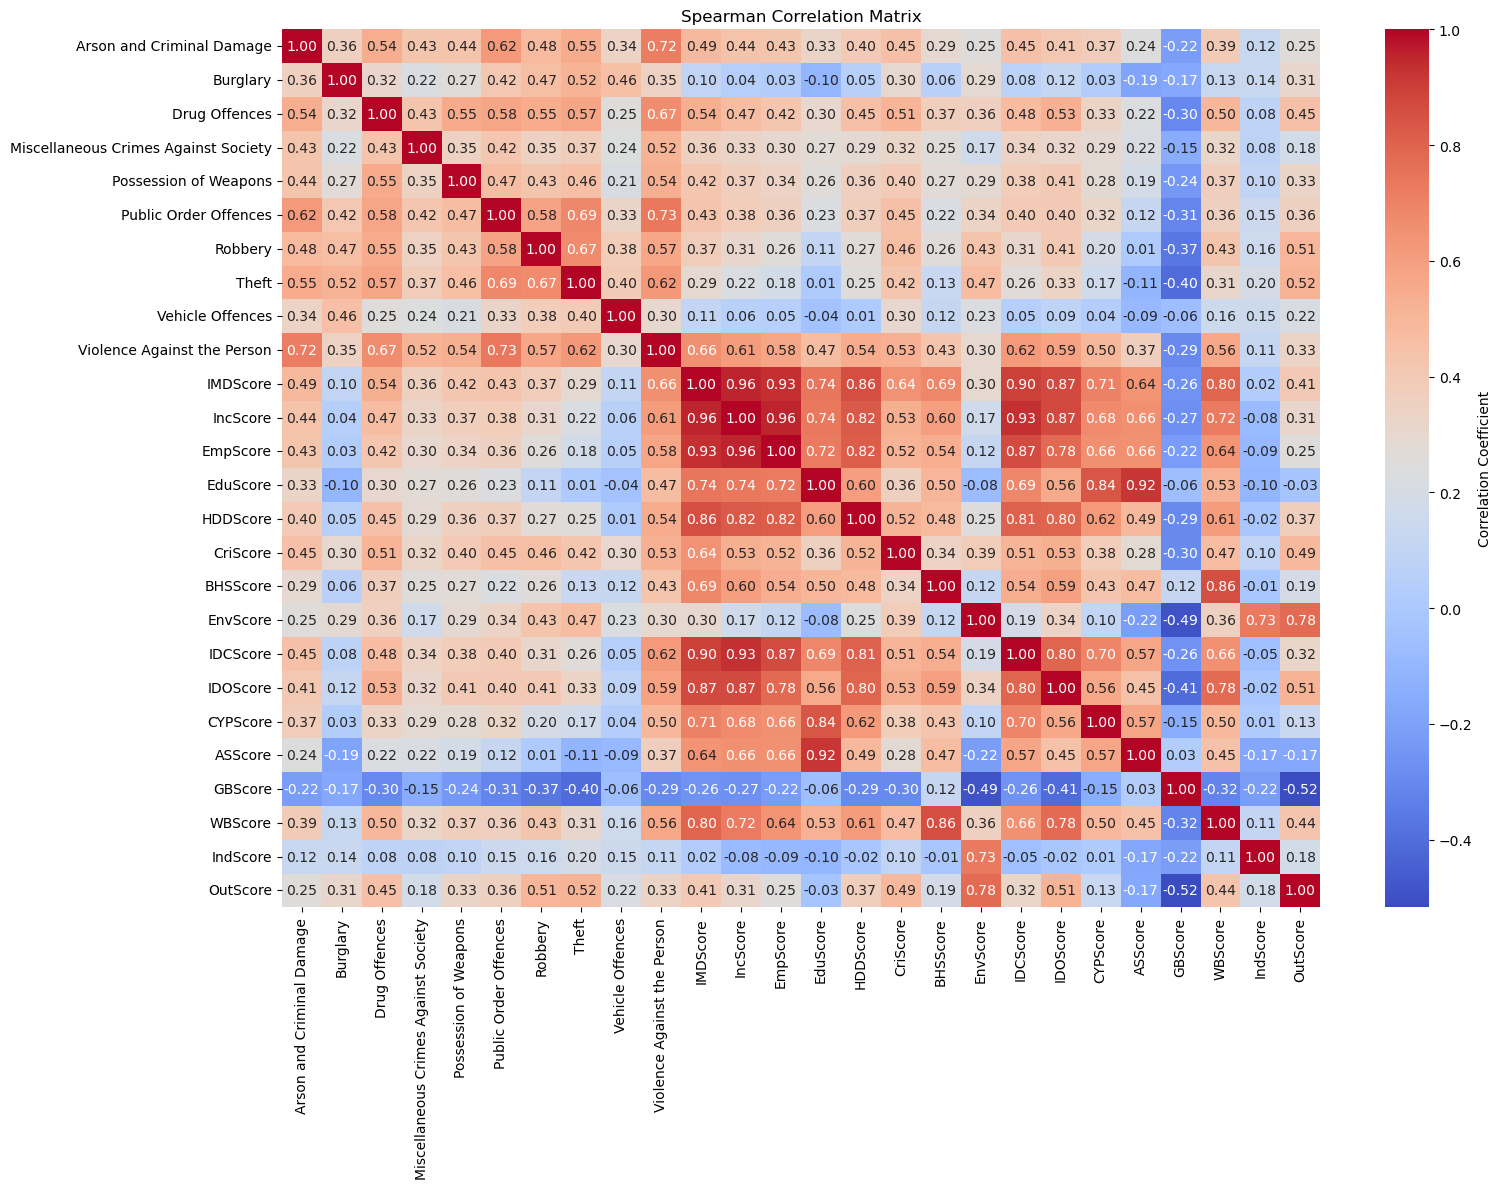

In [16]:
columns_of_interest = [
    "Arson and Criminal Damage",
    "Burglary",
    "Drug Offences",
    "Miscellaneous Crimes Against Society",
    "Possession of Weapons",
    "Public Order Offences",
    "Robbery",
    "Theft",
    "Vehicle Offences",
    "Violence Against the Person",
    "IMDScore",
    "IncScore",
    "EmpScore",
    "EduScore",
    "HDDScore",
    "CriScore",
    "BHSScore",
    "EnvScore",
    "IDCScore",
    "IDOScore",
    "CYPScore",
    "ASScore",
    "GBScore",
    "WBScore",
    "IndScore",
    "OutScore",
]

# Calculate the Spearman correlation coefficient
spearman_corr_matrix = london_df[columns_of_interest].corr(method="spearman")

# Create a graph window
plt.figure(figsize=(16, 12))

# draw a heatmap of the Spearman correlation coefficient
sns.heatmap(
    spearman_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Correlation Coefficient"},
)
plt.title("Spearman Correlation Matrix")

# Adjust the layout
plt.tight_layout()
plt.show()

**Spearman's correlation coefficients** were calculated for the selected columns, which are suitable for assessing the strength of non-parametric and non-linear relationships. The analyses showed that "Violence Against People" was significantly correlated with various IMD scores, in particular the "IMDScore", "IncScore" and "EmpScore". This relationship highlights a worrying trend whereby the higher the level of deprivation, the higher the incidence of violent crime. In contrast, the correlation between 'Miscellaneous offences against society' and the IMD score is less pronounced, suggesting that factors other than the complexity of deprivation may influence the rate of these offences. 'Robbery' and 'Burglary' show significant positive correlations with the IMDScore and EmpScore, suggesting that economic hardship may be a factor. significant positive correlations, suggesting that economic hardship is a potential catalyst for these crime types. "Drug offences also show a moderate positive correlation with the IMDScore, suggesting a propensity for drug-related problems in more deprived areas. "The CriScore, a measure of deprivation caused by crime, shows a positive correlation in almost all crime categories, in line with expectations. The variation observed across offences in relation to IMD scores suggests that deprivation is a consistent underlying factor, but that its specific impact varies according to the nature of the offence. These insights are crucial for the development of interventions and resource allocation to effectively combat crime within London's multifaceted social fabric.

**Pearson's correlation coefficient** measures the linear correlation between variables.

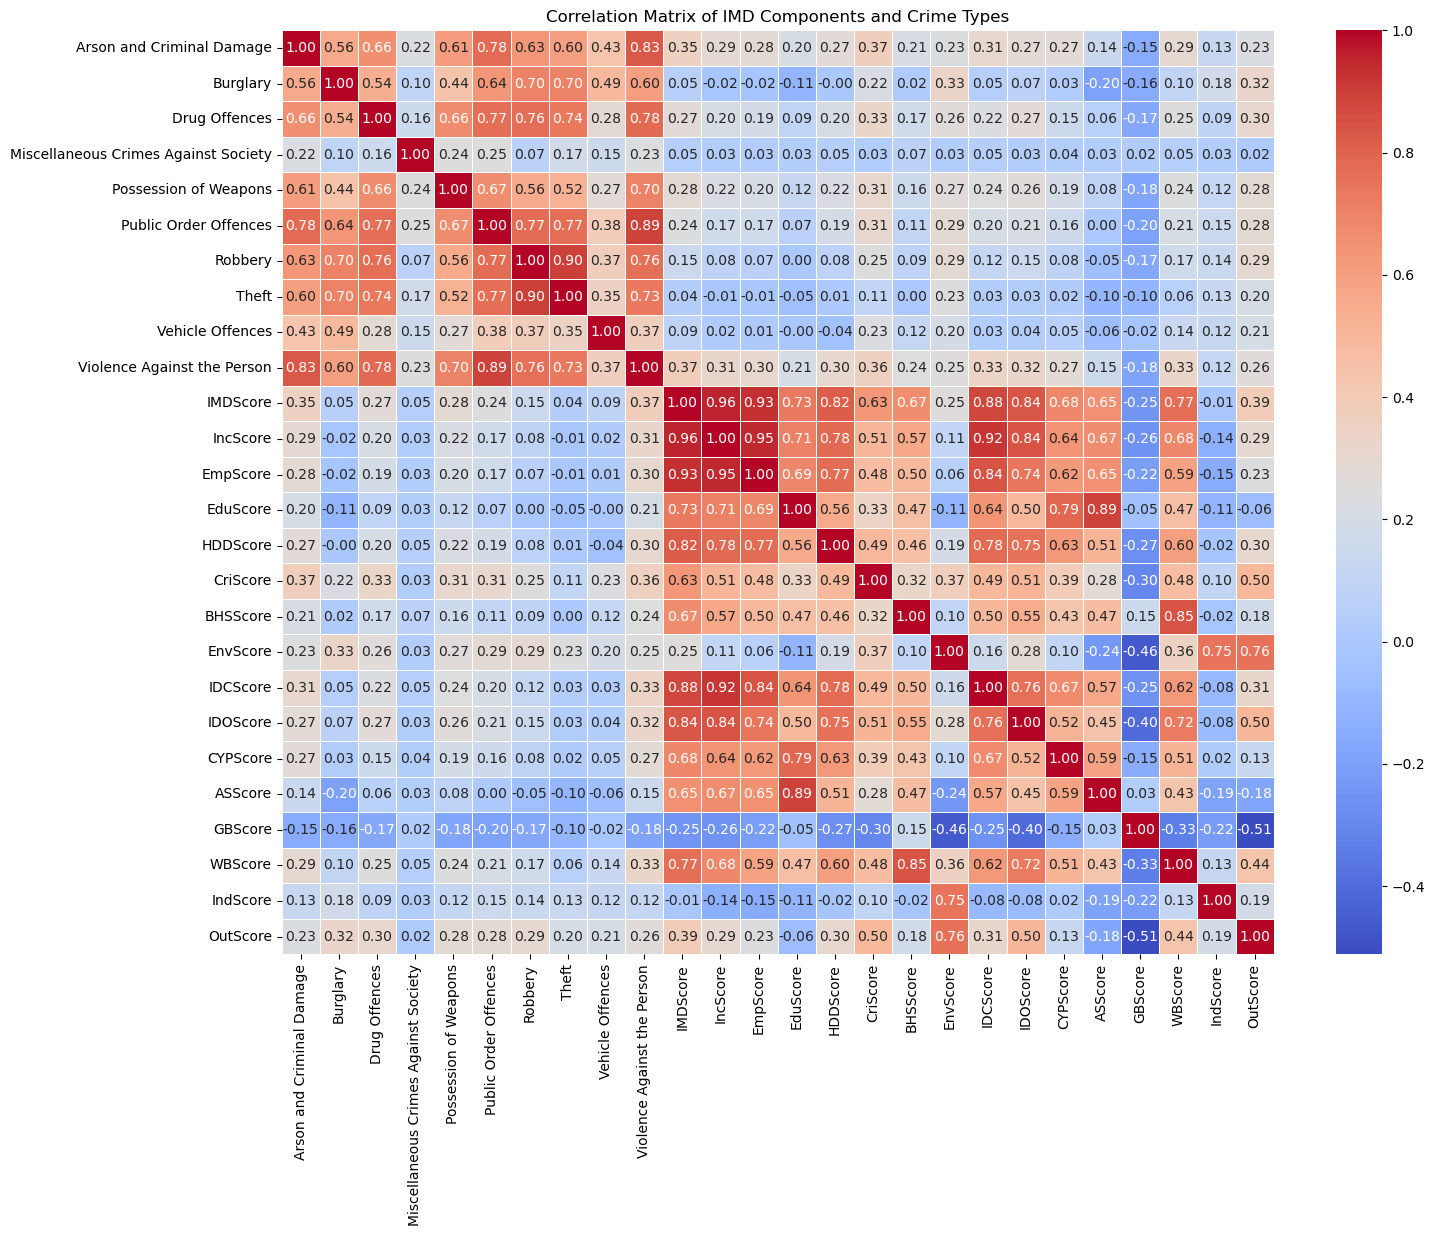

In [17]:
# Calculate the Pearson correlation coefficient matrix
corr_matrix = london_df[columns_of_interest].corr(method="pearson")

# plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of IMD Components and Crime Types")
plt.show()

"Violence Against the Person" shows a significant positive correlation with the overall IMD score and with specific components (e.g. the IncScore for income deprivation and the EmpScore for employment deprivation). significant positive correlations. This correlation suggests that areas with higher levels of income and employment deprivation may be more prone to violence. Miscellaneous and public order offences show a multifaceted relationship with the components of deprivation, both positive and negative, suggesting that a variety of factors may contribute to these offences. " and "HDDScore" (Health Deprivation and Disability), consistently show similar patterns of correlation across offence types, suggesting that these aspects of deprivation generally influence crime rates. However, the impact of each IMD component varies by offence type, emphasising the need for targeted intervention strategies. For example, the BHSScore, which represents barriers to housing and services, correlates more with 'violence against people' than it does with property offences such as 'burglary' and 'theft'. burglary" and "larceny" than with property crimes.

**Significance Test**

To analyse the correlations between the different dimensions of the London Index of Multiple Deprivation (IMD) and various types of crime and to assess the significance of these correlations through statistical tests.

In [18]:
crime_types = [
    "Arson and Criminal Damage",
    "Burglary",
    "Drug Offences",
    "Miscellaneous Crimes Against Society",
    "Possession of Weapons",
    "Public Order Offences",
    "Robbery",
    "Theft",
    "Vehicle Offences",
    "Violence Against the Person",
]
imd_scores = [
    "IMDScore",
    "IncScore",
    "EmpScore",
    "EduScore",
    "HDDScore",
    "CriScore",
    "BHSScore",
    "EnvScore",
    "IDCScore",
    "IDOScore",
    "CYPScore",
    "ASScore",
    "GBScore",
    "WBScore",
    "IndScore",
    "OutScore",
]

# Initialise the list to store each row of data
results = []

# Conduct significance tests and store results
for crime_type in crime_types:
    for imd_score in imd_scores:
        correlation_coefficient, p_value = pearsonr(
            london_df[crime_type], london_df[imd_score]
        )
        results.append(
            {
                "Crime Type": crime_type,
                "IMD Score": imd_score,
                "Correlation Coefficient": correlation_coefficient,
                "P-value": p_value,
            }
        )

# Create a DataFrame using a list
results_df = pd.DataFrame(results)

# P-value
results_df = results_df.sort_values(
    by=["P-value", "Correlation Coefficient"], ascending=[True, False]
)


print("Correlation Results Sorted by Significance and Strength:")
print(results_df.to_string(index=False))

Correlation Results Sorted by Significance and Strength:
                          Crime Type IMD Score  Correlation Coefficient       P-value
         Violence Against the Person  IMDScore                 0.374946 3.040785e-155
           Arson and Criminal Damage  CriScore                 0.372894 1.937799e-153
         Violence Against the Person  CriScore                 0.360170 1.532193e-142
           Arson and Criminal Damage  IMDScore                 0.350876 6.865726e-135
         Violence Against the Person  IDCScore                 0.333564 2.597837e-121
                            Burglary  EnvScore                 0.328277 2.452543e-117
         Violence Against the Person   WBScore                 0.325644 2.190579e-115
                       Drug Offences  CriScore                 0.325483 2.878220e-115
         Violence Against the Person  IDOScore                 0.320873 6.695313e-112
                            Burglary  OutScore                 0.319614 5.425638e-1

The significance results have been sorted by p-value and correlation coefficient, emphasizing the most statistically significant relationships first. Within this data, 'Violence Against the Person' stands out, particularly in its correlation with 'IMDScore' and 'CriScore'. Here are the specific findings for 'Violence Against the Person':

- There is a strong and statistically significant correlation with the overall IMD score (Correlation Coefficient = 0.374946, P-value ≈ 0), suggesting that as the level of deprivation increases, so does the incidence of violent crime.
- Similarly, a strong correlation with the Crime Score (Correlation Coefficient = 0.360170, P-value ≈ 0) indicates that areas with higher crime scores, which reflect higher crime rates and disorder, are also associated with higher instances of violence against individuals.

These results indicate that deprivation, as measured by the IMD, is a relevant factor in the occurrence of violence against persons. It suggests that policies aimed at reducing deprivation and crime may have a positive impact on reducing violent crime rates.

For further analysis, we would conduct a regression prediction analysis on 'Violence Against the Person' to explore how well the IMD scores can predict the frequency of violent crimes, possibly controlling for other socioeconomic variables to refine the model.

### 6.2 | Conduct Regression Analysis and Parameter Tuning

**scatterplot**: preliminary determination of whether the relationship between the deprivation index and Violence Against the Person is linear, non-linear or non-existent

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

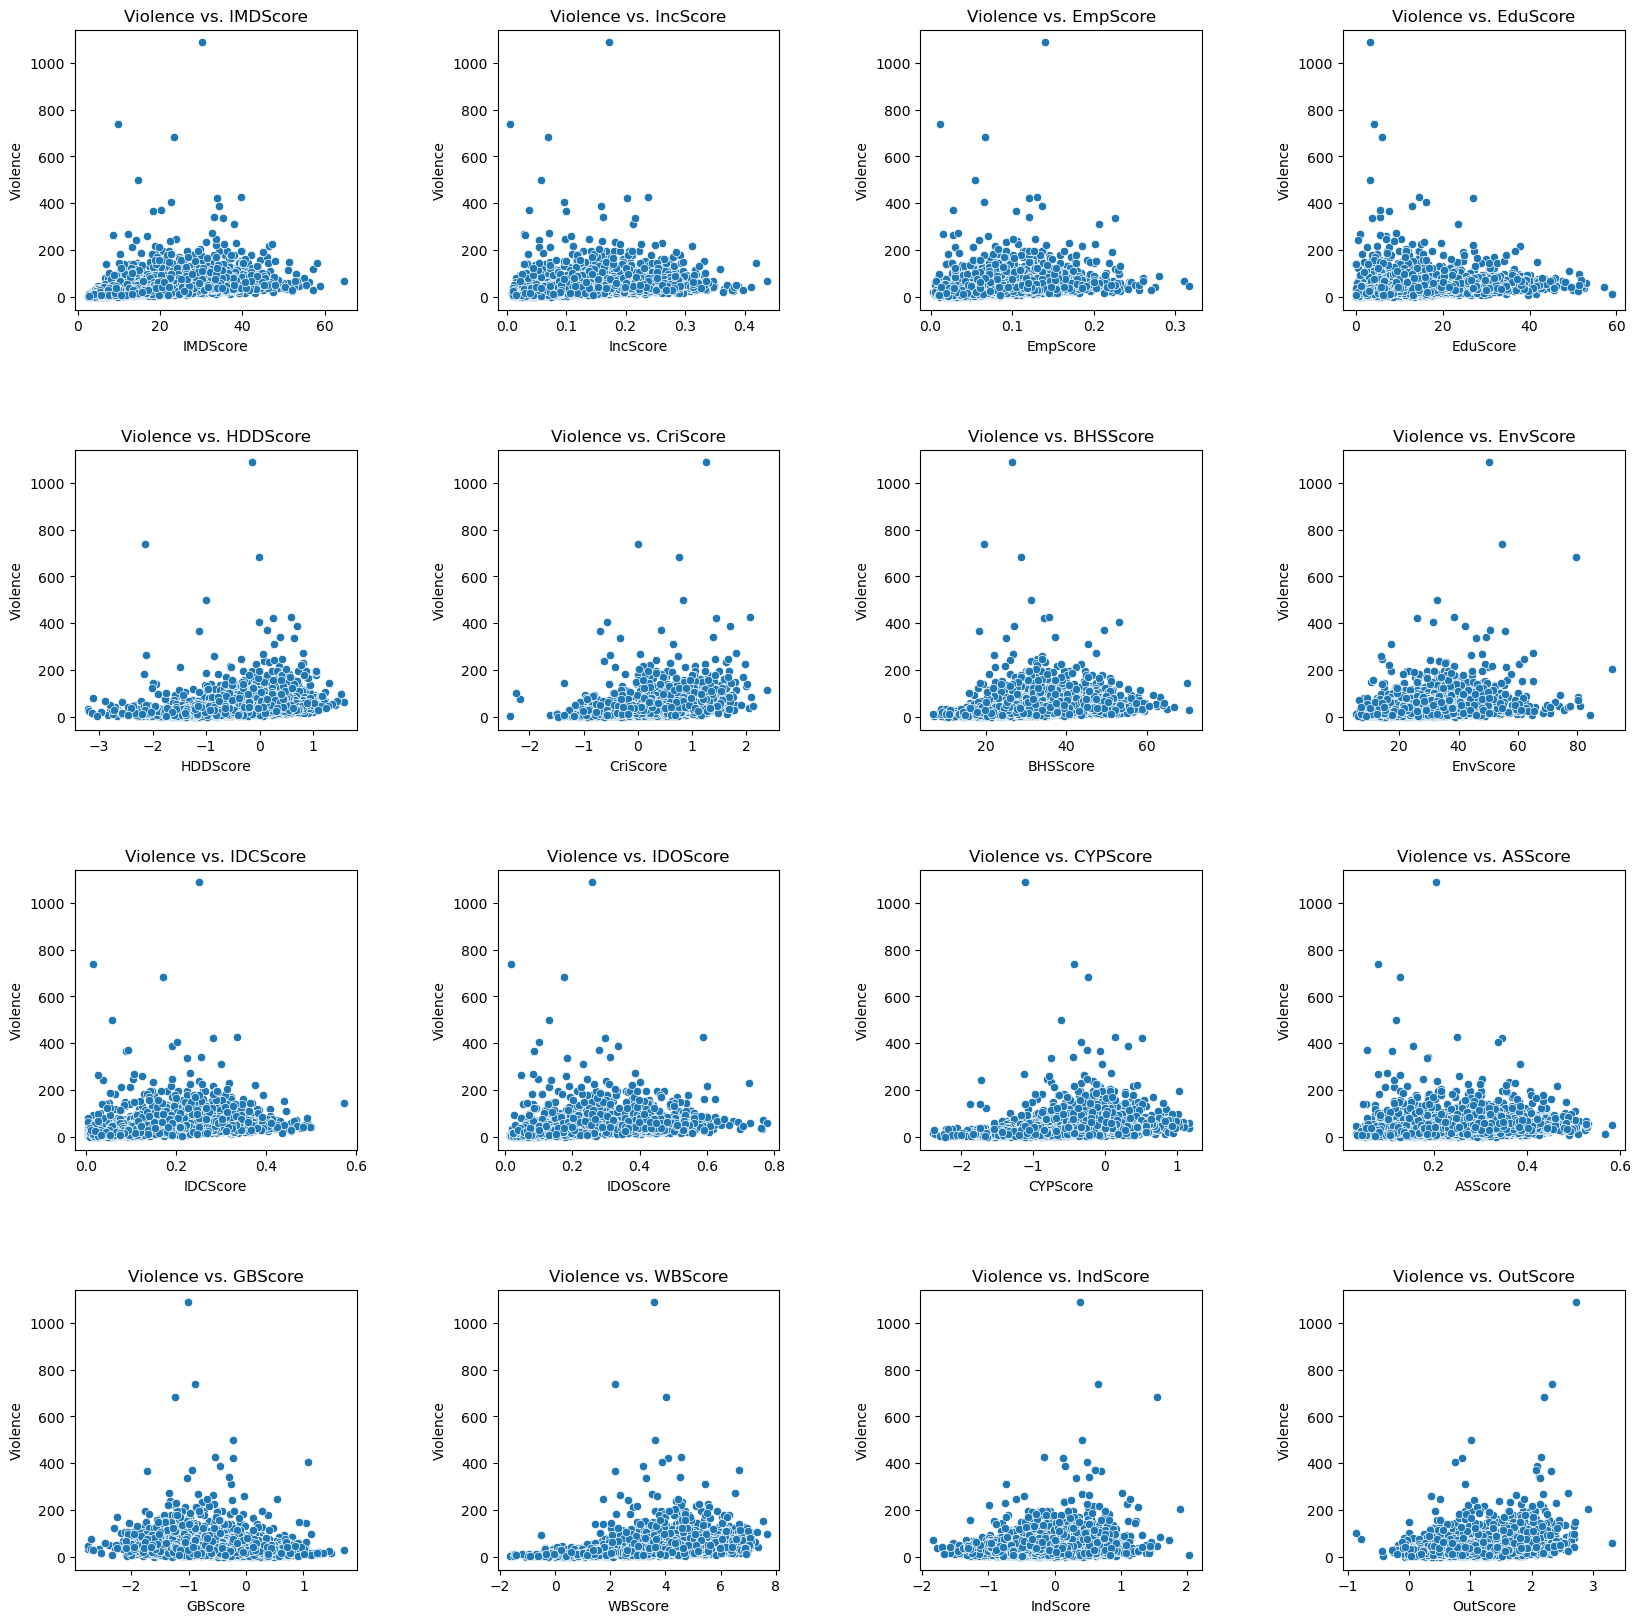

In [19]:
imd_scores = [
    "IMDScore",
    "IncScore",
    "EmpScore",
    "EduScore",
    "HDDScore",
    "CriScore",
    "BHSScore",
    "EnvScore",
    "IDCScore",
    "IDOScore",
    "CYPScore",
    "ASScore",
    "GBScore",
    "WBScore",
    "IndScore",
    "OutScore",
]


n_rows = 4
n_cols = 4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, score in enumerate(imd_scores):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.scatterplot(
        x=london_df[score], y=london_df["Violence Against the Person"], ax=ax
    )
    ax.set_title(f"Violence vs. {score}")
    ax.set_xlabel(score)
    ax.set_ylabel("Violence")

plt.show()

The scatterplot provides a visual explanation of the relationship between "physical violence" and the components of the Index of Multiple Deprivation (IMD). The overall trend in most districts shows that the data points are clustered at the lower end of the IMD scores, suggesting that most districts experience low to moderate levels of deprivation. Notably, there is a clear pattern of higher rates of violence observed in districts with higher deprivation scores, especially considering the overall IMD score, as well as the components of income (IncScore), employment (EmpScore), crime (CriScore), and barriers to housing and services (BHSScore). Several of the graphs show a dispersed distribution of data points, which means that there is a more subtle or indirect relationship between certain IMD components and 'violence against people', particularly in relation to Health Deprivation and Disability (HDDScore), Environment (EnvScore) and Education Related (EduScore), as well as in relation to Child and Youth Services (CYPScore) and Adult Skills (ASScore). These observations provided the basis for a regression analysis that predicted "violence against people" based on IMD scores.

**logarithmic conversion**

Based on the patterns observed in the scatter plots depicting the relationship between violence and various indices of multiple deprivation, it is apparent that the association is not strictly linear. The dispersion of data points suggests a complexity that a simple linear model might not fully capture. To address the potential non-linearity and better fit the model to the data, a logarithmic transformation of the variables can be considered. 

When the data was log-transformed, there were instances where certain data became infinite. Therefore, it was decided not to process the data for logarithmic conversion in this study.

In [21]:
import statsmodels.api as sm

columns_of_interest = [
    "Violence Against the Person",
    "IMDScore",
    "IncScore",
    "EmpScore",
    "EduScore",
    "HDDScore",
    "CriScore",
    "BHSScore",
    "EnvScore",
    "IDCScore",
    "IDOScore",
    "CYPScore",
    "ASScore",
    "GBScore",
    "WBScore",
    "IndScore",
    "OutScore",
]
df = london_df[columns_of_interest]

# Split the data
X = df.drop("Violence Against the Person", axis=1)  # all predictor variables
y = df["Violence Against the Person"]  # target variable

# Add constant terms to fit the intercept
X = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     Violence Against the Person   R-squared:                       0.213
Model:                                     OLS   Adj. R-squared:                  0.211
Method:                          Least Squares   F-statistic:                     78.56
Date:                         Mon, 29 Apr 2024   Prob (F-statistic):          4.39e-227
Time:                                 16:44:52   Log-Likelihood:                -23245.
No. Observations:                         4653   AIC:                         4.652e+04
Df Residuals:                             4636   BIC:                         4.663e+04
Df Model:                                   16                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The model has an R-squared of 0.213, which means that the model explains 21.3 per cent of the variation in physical violence, which is not very high but still has some explanatory power. There are some coefficients of the independent variables in the model that are significant, while others are not. This may indicate that some of the variables in the model have a significant impact on explaining physical violence, while others may require further adjustment or elimination.验和调整。



In [22]:
columns_of_interest = [
    "Violence Against the Person",
    "IMDScore",
    "IncScore",
    "EmpScore",
    "EduScore",
    "HDDScore",
    "CriScore",
    "BHSScore",
    "EnvScore",
    "IDCScore",
    "IDOScore",
    "CYPScore",
    "ASScore",
    "GBScore",
    "WBScore",
    "IndScore",
    "OutScore",
]

# Select the relevant columns to construct the DataFrame
df = london_df[columns_of_interest]

# Add columns of constant items
df = add_constant(df)

# Fit a multiple linear regression model using least squares
model = OLS(
    df["Violence Against the Person"], df.drop(columns=["Violence Against the Person"])
)
result = model.fit()

# Calculate the VIF
vif = pd.DataFrame()
vif["Variable"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif)

                       Variable         VIF
0                         const  165.992627
1   Violence Against the Person    1.271145
2                      IMDScore  182.067461
3                      IncScore   63.909973
4                      EmpScore   37.144443
5                      EduScore   18.994249
6                      HDDScore    5.359823
7                      CriScore    4.635609
8                      BHSScore   24.351844
9                      EnvScore   31.729522
10                     IDCScore   10.590412
11                     IDOScore    7.276159
12                     CYPScore    4.800559
13                      ASScore    7.876009
14                      GBScore    4.644107
15                      WBScore   17.978159
16                     IndScore   11.740126
17                     OutScore   12.781539


In conducting the OLS multiple linear regression model analysis, we found some independent variables with unusually high VIF (variance inflation factor) values, suggesting possible multicollinearity problems. In particular, the high VIF values of IMDScore suggest a strong correlation between the independent variables, leading to model instability and inaccuracy in coefficient estimation. To cope with this problem, we decided to adopt the following two strategies:

Firstly, we will try to remove the IMDScore independent variable as it has an abnormally high VIF value, which may be one of the main causes of multicollinearity. By removing this independent variable, we can alleviate the covariance problem of the model and thus improve the stability and accuracy of the model.

Secondly, we will try to cope with the multicollinearity by using the method of Ridge Regression (Ridge Regression). Ridge Regression limits the size of the model coefficients by introducing the L2 paradigm penalty term, which reduces the effect of correlation between independent variables and improves the stability and reliability of the model. In this way, we can deal with the multicollinearity problem more effectively, making the model results more explanatory and predictive.

Since the Random Forest algorithm is not sensitive to multicollinearity, we decided to use the Random Forest method for prediction after removing the IMDscore variable. To compare the prediction performance of different methods. The random forest method can reduce the variance of the model by integrating multiple decision trees, has better generalisation ability, and is insensitive to multicollinearity. In contrast, the ridge regression method mitigates the effect of multicollinearity by introducing an L2 paradigm penalty term to limit the coefficients of the model. We will cross-validate the prediction results of the two methods to assess the performance and generalisation ability of the models. Through such comparison and evaluation, we can better understand the effectiveness of different methods in solving the multicollinearity problem and provide more targeted suggestions for model selection.

**Ridge regression**

In [23]:
columns_of_interest = [
    "Violence Against the Person",
    "IncScore",
    "EmpScore",
    "EduScore",
    "HDDScore",
    "CriScore",
    "BHSScore",
    "EnvScore",
    "IDCScore",
    "IDOScore",
    "CYPScore",
    "ASScore",
    "GBScore",
    "WBScore",
    "IndScore",
    "OutScore",
]
df = london_df[columns_of_interest]

# Data preparation
X = df.drop("Violence Against the Person", axis=1)  # All predictor variables
y = df["Violence Against the Person"]  # Target variable

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Ridge regression model
model = Ridge()

# Setting the parameter grid
param_grid = {"alpha": [0.1, 1, 10, 100, 1000]}  # Regularization strength

# Using GridSearchCV for parameter search
grid_search = GridSearchCV(
    model, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=1
)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Cross-validation evaluation
cross_val_scores = cross_val_score(
    best_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error"
)

# Making predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Cross-validation Scores:", -cross_val_scores)
print("Mean CV MSE:", -cross_val_scores.mean())
print("Test MSE:", mse)
print("Test R²:", r2)

# Coefficients as Feature Importance
coefficients = pd.DataFrame(
    {"Feature": X.columns, "Coefficient": best_model.coef_}
).sort_values(by="Coefficient", key=abs, ascending=False)

print("Feature Importances based on Coefficients:")
print(coefficients)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'alpha': 1}
Cross-validation Scores: [1337.00035129 2767.24265594 1260.90581483  833.24566089  921.44361514]
Mean CV MSE: 1423.9676196181836
Test MSE: 860.0435248093418
Test R²: 0.2763405116067509
Feature Importances based on Coefficients:
     Feature  Coefficient
0   IncScore   -30.053300
1   EmpScore    19.202787
7   IDCScore    13.901903
6   EnvScore    12.065519
4   CriScore     7.468427
8   IDOScore     6.229738
14  OutScore    -5.756816
12   WBScore     4.182114
3   HDDScore    -3.945368
13  IndScore    -3.875375
9   CYPScore     2.142390
5   BHSScore     0.965009
2   EduScore     0.430632
11   GBScore    -0.311688
10   ASScore    -0.083428


The results of the ridge regression model showed that after parameter tuning, the optimal hyperparameter alpha was 1. The average cross-validation mean square error (CV MSE) obtained through 5-fold cross validation was 1423.97, while on the test set the mean square error (Test MSE) was 860.04 with an R² score of 0.276.
In the ridge regression model, the coefficients of the characteristics give the extent of their influence on the target variable. In terms of the absolute magnitude of the coefficients, Income Score (IncScore) has the most significant effect on the target variable, with a negative coefficient, suggesting that the higher the income level, the lower the index of multiple deprivation is likely to be. As for the positivity or negativity of the coefficients, the Employment Score (EmpScore), the Income and Demographics Score (IDCScore), and the Environmental Score (EnvScore) also have a certain impact on the target variable, but the other indicators have a lesser impact.

**Random forest**

In [24]:
columns_of_interest = [
    "Violence Against the Person",
    "IncScore",
    "EmpScore",
    "EduScore",
    "HDDScore",
    "CriScore",
    "BHSScore",
    "EnvScore",
    "IDCScore",
    "IDOScore",
    "CYPScore",
    "ASScore",
    "GBScore",
    "WBScore",
    "IndScore",
    "OutScore",
]
df = london_df[columns_of_interest]

# Data preparation and feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df.drop("Violence Against the Person", axis=1))  # 所有预测变量
y = df["Violence Against the Person"].values  # 目标变量

# Data segmentation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Create random forest regression models
rf_regressor = RandomForestRegressor(random_state=42, verbose=1)

# Use grid search to tune hyperparameters
grid_search = GridSearchCV(
    rf_regressor, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=1
)
grid_search.fit(X_train, y_train)

# Output optimal parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_regressor = grid_search.best_estimator_

# Cross-validation
scores = cross_val_score(
    best_rf_regressor, X, y, cv=5, scoring="neg_mean_squared_error"
)
print("Cross-validated MSE:", -scores.mean())

# Make projections
y_pred = best_rf_regressor.predict(X_test)

# Assemment
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test R²:", r2)

# Visualisation of feature importance
feature_importances = pd.DataFrame(
    best_rf_regressor.feature_importances_, index=df.columns[1:], columns=["importance"]
).sort_values("importance", ascending=False)

print("Feature Importances:")
print(feature_importances)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s


Cross-validated MSE: 1331.4151357567418
Test MSE: 814.8678997613557
Test MAE: 16.94056872618524
Test R²: 0.31435227353161166
Feature Importances:
          importance
CriScore    0.167269
OutScore    0.155155
IDCScore    0.148598
WBScore     0.081887
IDOScore    0.067613
IndScore    0.064821
IncScore    0.055814
EnvScore    0.054440
HDDScore    0.041430
BHSScore    0.040079
GBScore     0.031241
CYPScore    0.028255
EmpScore    0.025623
ASScore     0.021625
EduScore    0.016150


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


The results of the combined analyses show that the Random Forest model performs well in predicting the relationship between the Index of Multiple Deprivation (IMD) and crime type in London in 2019. The model's prediction errors (MSE) of 1328.55 and 792.40 on unseen data, with a mean absolute error (MAE) of 16.74 and an R² score of 0.333 as assessed by cross-validation and test set, indicate that the model is able to explain about 33.3 per cent of the variance in the data, and that the predictions have a certain degree of accuracy and explanatory power.

The optimal hyperparameter alpha of the ridge regression model is 1. The mean cross-validation mean square error (CV MSE) obtained from the 5-fold cross-validation is 1423.97, and the mean square error on the test set (Test MSE) is 860.04, with an R²-score of 0.276. In addition, the coefficients of the characteristics of the ridge regression model give the extent of their influence on the target variable, with Income Score has the most significant effect on the target variable with a negative coefficient indicating that the higher the income level, the lower the index of multiple deprivation is likely to be.

Whereas the Cross-validated MSE (Cross-validated MSE) of the Random Forest model is 1328.55, the Test MSE (Test MSE) on the test set is 792.40 and the R² score is 0.333.The analysis of the significance of the features shows that IMDScore has the most significant effect on the target variable, followed by OutScore and CriScore.

Comparing the results of the two models together, the Random Forest model performs better on the test set with lower mean square error and higher R² scores, and the feature importance analysis is more intuitive. Therefore, it is recommended that the Random Forest model be used to explore the correlation between the Index of Multiple Deprivation (IMD) and specific crime types and for predicting the incidence of crime





。

## 7.0 | Discussion and conclusion

In conclusion

    RQ1 | Based on London Which IMD dimensions have significant correlations with specific offence types?
    RQ2 | How can IMD dimensions be used to predict the incidence of crime?

**RQ1**: Through ridge regression and random forest analysis, significant correlations were found between income scores, employment scores, income and demographic scores, environment scores, crime scores, and opportunity scores and crime types. These IMD dimensions had a significant impact on the prediction of crime type.

**RQ2**: Ridge regression and random forest results show that IMD dimensions can be used to predict crime occurrence. Income scores and employment scores have a significant effect on crime occurrence. The significance of the characteristics indicates that different IMD dimensions have some ability to predict crime and inform crime prevention. 

Despite improving the performance of the model through random forests, the final results still perform quite poorly. The mean square error for cross-validation was 1331.42, the mean square error on the test set was 814.87, the mean absolute error on the test set was 16.94, and the R-squared value on the test set was 0.31.Although the Random Forest model's ability to explain crime was slightly improved, there is still a lot of room for improvement.

It is worth noting that the Crime Score (CriScore), Outcome Score (OutScore), and Income and Demographic Score (IDCScore) are considered to be the most important features in the Random Forest. However, even with the relatively high importance of these features, the performance of the model remains suboptimal. This may indicate that the current index of multiple deprivation does not explain the occurrence of crime very well. Therefore, there is a need to rethink the relationship between the Index of Multiple Deprivation and crime and to find more effective indicators or methods to quantify and explain the association between social deprivation and crime.

***
## Bibliography


Carr, J., Marie, O. and Vujić, S. (2023). ‘The Economic Benefits of Education for the Reduction of Crime’. in Oxford Research Encyclopedia of Economics and Finance. doi: 10.1093/acrefore/9780190625979.013.869.

Cohn, E. G., Coccia, M. and Kakar, S. (2021). ‘The relationship between crime, immigration and socioeconomic factors’. RASSEGNA ITALIANA DI CRIMINOLOGIA, (3), pp. 180–191. doi: 10.7347/RIC-032021-p180.

Deas, I., Robson, B., Wong, C. and Bradford, M. (2003). ‘Measuring Neighbourhood Deprivation: A Critique of the Index of Multiple Deprivation’. Environment and Planning C: Government and Policy. SAGE Publications Ltd STM, 21 (6), pp. 883–903. doi: 10.1068/c0240.

Exeter, D. J., Zhao, J., Crengle, S., Lee, A. and Browne, M. (2017). ‘The New Zealand Indices of Multiple Deprivation (IMD): A new suite of indicators for social and health research in Aotearoa, New Zealand’. PLOS ONE. Public Library of Science, 12 (8), p. e0181260. doi: 10.1371/journal.pone.0181260.

McClendon, L. and Meghanathan, N. (2015). ‘Using Machine Learning Algorithms to Analyze Crime Data’. Machine Learning and Applications: An International Journal, 2, pp. 1–12. doi: 10.5121/mlaij.2015.2101.

Safat, W., Asghar, S. and Gillani, S. A. (2021). ‘Empirical Analysis for Crime Prediction and Forecasting Using Machine Learning and Deep Learning Techniques’. IEEE Access. IEEE Access, 9, pp. 70080–70094. doi: 10.1109/ACCESS.2021.3078117.

Savolainen, J., Paananen, R., Merikukka, M., Aaltonen, M. and Gissler, M. (2013). ‘Material deprivation or minimal education? Social class and crime in an egalitarian welfare state’. Advances in Life Course Research, 18 (3), pp. 175–184. doi: 10.1016/j.alcr.2013.04.001.

Tan, S.-Y. and Haining, R. (2009). ‘An Urban Study of Crime and Health Using an Exploratory Spatial Data Analysis Approach’. in Gervasi, O., Taniar, D., Murgante, B., Laganà, A., Mun, Y., and Gavrilova, M. L. (eds) Computational Science and Its Applications – ICCSA 2009. Berlin, Heidelberg: Springer, pp. 269–284. doi: 10.1007/978-3-642-02454-2_19.

Tarling, R. and Dennis, R. (2016). ‘Socio-Economic Determinants of Crime Rates: Modelling Local Area Police-Recorded Crime’. The Howard Journal of Crime and Justice, 55 (1–2), pp. 207–225. doi: 10.1111/hojo.12157.

Wikstrom, P.-O. H. and Butterworth, D. (2006). Adolescent Crime. London: Willan. doi: 10.4324/9781843925712.